In [1]:
# Generate RFM
import pandas as pd

# Load data
data = pd.read_csv('E:/Desktop/MiniProject/cleaned_simulated_transaction_2024.csv')

# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Define the season assignment function
def assign_season(date):
    month = date.month
    if month in (1, 2, 3):
        return 'Q1'
    elif month in (4, 5, 6):
        return 'Q2'
    elif month in (7, 8, 9):
        return 'Q3'
    elif month in (10, 11, 12):
        return 'Q4'

# Apply the season calculation function
data['Season'] = data['Date'].apply(assign_season)

# Define season end dates according to the data coverage
season_end_dates = {
    'Q1': pd.Timestamp(year=2023, month=3, day=31),
    'Q2': pd.Timestamp(year=2023, month=6, day=30),
    'Q3': pd.Timestamp(year=2023, month=9, day=30),
    'Q4': pd.Timestamp(year=2023, month=12, day=6)  # Dataset ends on December 6
}

# Group by account and season to calculate RFM values
rfm_values = data.groupby(['Account No', 'Season']).apply(lambda group: pd.Series({
    'R': (season_end_dates[group['Season'].iloc[0]] - group['Date'].max()).days + 1,
    'F': group.shape[0],
    'M': group['Amount'].apply(lambda x: max(x, -x)).sum()
})).reset_index()

# Extract RFM and Account No for new dataset
rfm_dataset = rfm_values[['Account No', 'R', 'F', 'M']]

# Save the new dataset as CSV
output_path = 'E:/Desktop/MiniProject/RFM.csv'
rfm_dataset.to_csv(output_path, index=False)

C:\Users\m1328\AppData\Local\Temp\ipykernel_6604\3900192778.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rfm_values = data.groupby(['Account No', 'Season']).apply(lambda group: pd.Series({


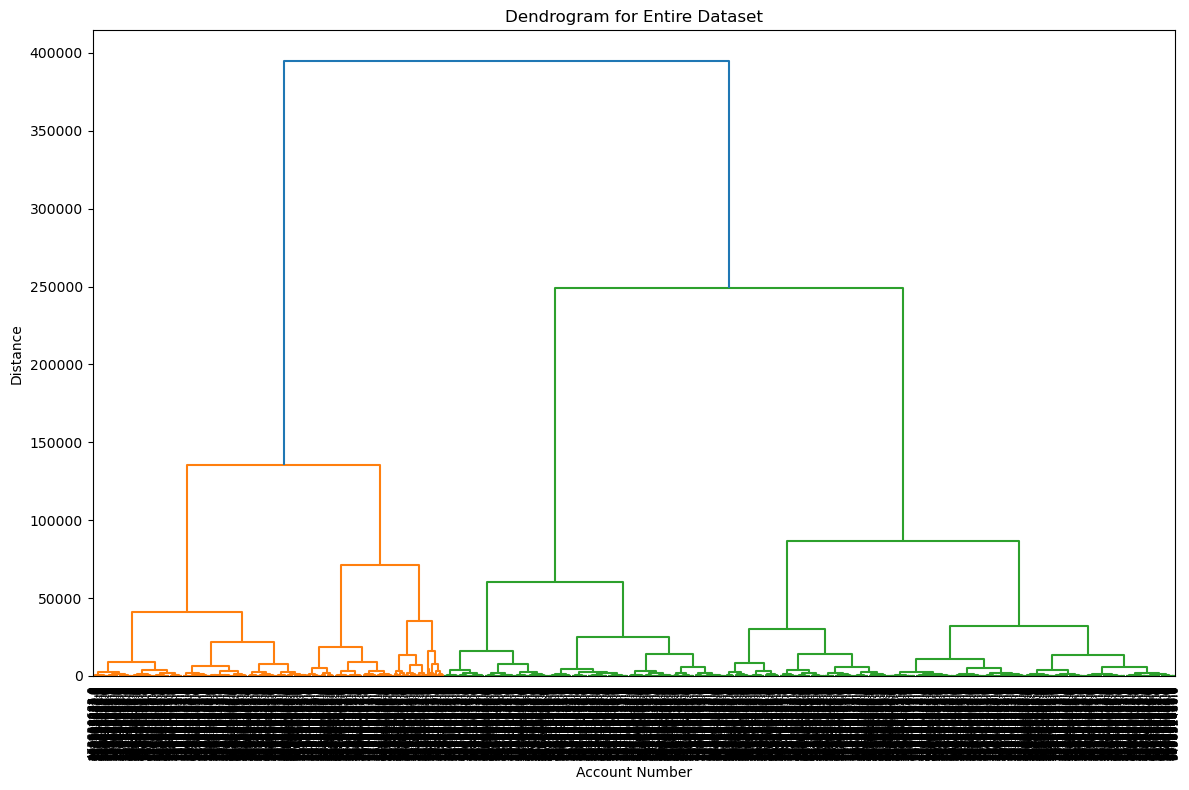

In [33]:
# Finding the Optimal Number of Clusters
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assume you have already loaded your RFM dataset
rfm_data = pd.read_csv('E:/Desktop/MiniProject/rfm_data.csv')

# Prepare clustering data (exclude non-numeric columns)
data_for_clustering = rfm_data[['R', 'F', 'M']]

# Generate linkage matrix using Ward's method
Z = linkage(data_for_clustering, method='ward')

# Plot dendrogram for the entire dataset
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=rfm_data['Account No'].astype(str).values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram for Entire Dataset')
plt.xlabel('Account Number')
plt.ylabel('Distance')
plt.tight_layout()

# Save as a PDF file
plt.savefig('E:/Desktop/MiniProject/Dendrogram.pdf', format='pdf')
plt.show()

# # Analyze each quarter separately
# for quarter in sorted(rfm_data['quarter'].unique()):
#     quarter_data = rfm_data[rfm_data['quarter'] == quarter][['R', 'F', 'M']]
#     Z_quarter = linkage(quarter_data, method='ward')
    
#     plt.figure(figsize=(12, 8))
#     dendrogram(Z_quarter, labels=rfm_data[rfm_data['quarter'] == quarter]['Account No'].astype(str).values,
#                leaf_rotation=90, leaf_font_size=8)
#     plt.title(f'Dendrogram for Quarter {quarter}')
#     plt.xlabel('Account Number')
#     plt.ylabel('Distance')
#     plt.tight_layout()
#     plt.show()

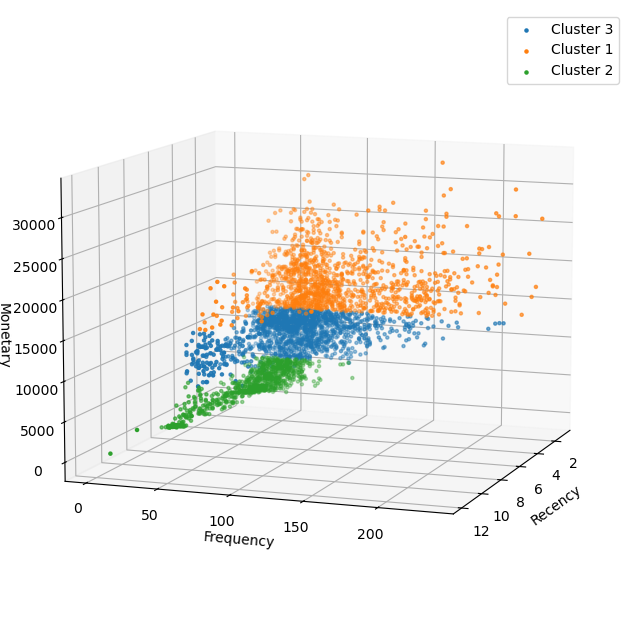

In [2]:
# # Overall 3D Clustering Plot
# import pandas as pd
# from scipy.cluster.hierarchy import linkage, fcluster
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Load data
# rfm_data = pd.read_csv('E:/Desktop/MiniProject/rfm_data.csv')

# # Prepare data for clustering (exclude non-numeric columns)
# data_for_clustering = rfm_data[['R', 'F', 'M']]

# # Generate linkage matrix using Ward's method
# Z = linkage(data_for_clustering, method='ward')

# # Define the number of clusters
# n_clusters = 3

# # Apply hierarchical clustering
# cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

# # Add cluster labels to the dataset
# rfm_data['Cluster'] = cluster_labels

# # Ensure Cluster column is of integer type
# rfm_data['Cluster'] = rfm_data['Cluster'].astype(int)

# # Create 3D scatter plot, adjust figure size
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot data for each cluster
# # Adjust s parameter to set data point size
# for cluster in rfm_data['Cluster'].unique():
#     cluster_data = rfm_data[rfm_data['Cluster'] == cluster]
#     # Adjust data point size
#     ax.scatter(cluster_data['R'], cluster_data['F'], cluster_data['M'], label=f'Cluster {cluster}', s=5)

# # Set axis labels
# ax.set_xlabel('Recency')
# ax.set_ylabel('Frequency')
# ax.set_zlabel('Monetary')

# # Add legend
# ax.legend()

# # Adjust viewing angle
# ax.view_init(elev=10, azim=20)

# # Save as a PDF file
# # plt.savefig('E:/Desktop/MiniProject/RFM_3D_3.pdf', format='pdf')

# # Display the plot
# plt.show()


C:\Users\m1328\AppData\Local\Temp\ipykernel_14292\1558709474.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter1_data['Cluster'] = cluster_labels
C:\Users\m1328\AppData\Local\Temp\ipykernel_14292\1558709474.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter1_data['Cluster'] = quarter1_data['Cluster'].astype(int)


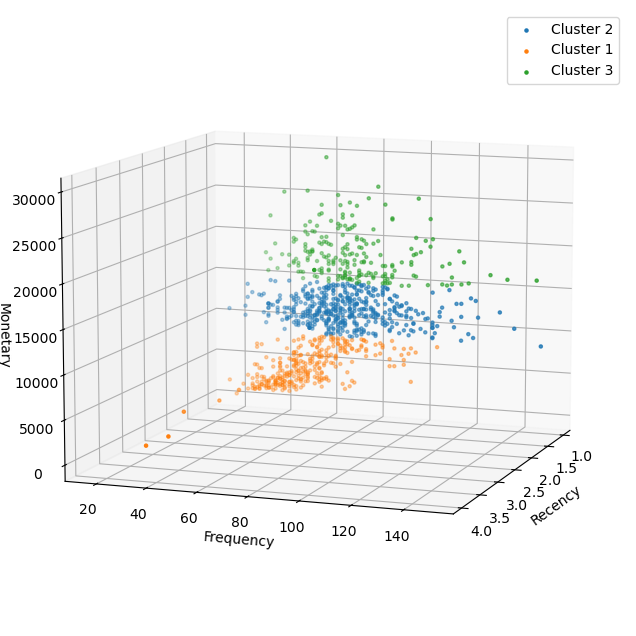

In [3]:
# 3D Clustering Plot for First Quarter
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
rfm_data = pd.read_csv('E:/Desktop/MiniProject/rfm_data.csv')

# Filter data for the first quarter
quarter1_data = rfm_data[rfm_data['quarter'] == 1]

# Prepare data for clustering (exclude non-numeric columns)
data_for_clustering = quarter1_data[['R', 'F', 'M']]

# Generate linkage matrix using Ward's method
Z = linkage(data_for_clustering, method='ward')

# Define the number of clusters
n_clusters = 3

# Apply hierarchical clustering
cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

# Add cluster labels to the filtered dataset
quarter1_data['Cluster'] = cluster_labels

# Ensure Cluster column is of integer type
quarter1_data['Cluster'] = quarter1_data['Cluster'].astype(int)

# Create a 3D scatter plot, adjust figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data for each cluster
# Adjust s parameter to set data point size
for cluster in quarter1_data['Cluster'].unique():
    cluster_data = quarter1_data[quarter1_data['Cluster'] == cluster]
    ax.scatter(cluster_data['R'], cluster_data['F'], cluster_data['M'], label=f'Cluster {cluster}', s=5)

# Set axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Add a legend
ax.legend()

# Adjust viewing angle
ax.view_init(elev=10, azim=20)

# Save as a PDF file
plt.savefig('E:/Desktop/MiniProject/Quarter1_RFM_3D_3.pdf', format='pdf')

# Display the chart
plt.show()


In [2]:
# Normalize the entire dataset
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster

# Load data
rfm_data = pd.read_csv('E:/Desktop/MiniProject/rfm_data.csv')

# Normalize R, F, M columns across the entire dataset
rfm_min = rfm_data[['R', 'F', 'M']].min()
rfm_max = rfm_data[['R', 'F', 'M']].max()
rfm_data[['Normalized_R', 'Normalized_F', 'Normalized_M']] = (rfm_data[['R', 'F', 'M']] - rfm_min) / (rfm_max - rfm_min)

# Initialize a DataFrame to store aggregated results
aggregated_results = []

# Perform hierarchical clustering for each quarter separately
for quarter in sorted(rfm_data['quarter'].unique()):
    quarter_data = rfm_data[rfm_data['quarter'] == quarter].copy()
    # Generate linkage matrix using Ward's method and apply clustering
    Z = linkage(quarter_data[['R', 'F', 'M']], method='ward')
    cluster_labels = fcluster(Z, 3, criterion='maxclust')
    quarter_data['Cluster'] = cluster_labels

    # Calculate the average of normalized R, F, M for each cluster
    for cluster in sorted(quarter_data['Cluster'].unique()):
        cluster_data = quarter_data[quarter_data['Cluster'] == cluster]
        percent_of_customers = round((len(cluster_data) / len(quarter_data) * 100), 2)
        avg_R = cluster_data['Normalized_R'].mean()
        avg_F = cluster_data['Normalized_F'].mean()
        avg_M = cluster_data['Normalized_M'].mean()

    # # Calculate the average of original R, F, M for each cluster
    # for cluster in sorted(quarter_data['Cluster'].unique()):
    #     cluster_data = quarter_data[quarter_data['Cluster'] == cluster]
    #     percent_of_customers = round((len(cluster_data) / len(quarter_data) * 100), 2)
    #     avg_R = round(cluster_data['R'].mean(), 2)
    #     avg_F = round(cluster_data['F'].mean(), 2)
    #     avg_M = round(cluster_data['M'].mean(), 2)

        # Store the results
        aggregated_results.append({
            'Quarter': quarter,
            'Cluster': cluster,
            'Percent of customer': percent_of_customers,
            'Normalized_R': avg_R,
            'Normalized_F': avg_F,
            'Normalized_M': avg_M
            # 'Avg_R': avg_R,  # Use average of original R
            # 'Avg_F': avg_F,  # Use average of original F
            # 'Avg_M': avg_M   # Use average of original M
        })

# Convert the list of dictionaries to a DataFrame
aggregated_df = pd.DataFrame(aggregated_results)
aggregated_df.to_csv('E:/Desktop/MiniProject/Normalized_RFM_Per_Quarter.csv', index=False)
# aggregated_df.to_csv('E:/Desktop/MiniProject/RFM_Per_Quarter.csv', index=False)

In [9]:
# Calculate Weights
import numpy as np

A = np.array([
    [1, 1/3, 4],
    [3, 1, 5],
    [1/4, 1/5, 1]
])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Extract the principal eigenvector (corresponding to the maximum eigenvalue)
max_index = eigenvalues.argmax()
principal_eigenvector = eigenvectors[:, max_index].real
weights = principal_eigenvector / principal_eigenvector.sum()

# Print normalized weights
print("Weights:", weights)

# Calculate the Consistency Index (CI) and Consistency Ratio (CR)
n = A.shape[0]
CI = (eigenvalues.max() - n) / (n - 1)
RI = [0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49]  # Random Index values
CR = CI / RI[n-1]
print("CI:", CI)
print("CR:", CR)

Weights: [0.27968751 0.62669647 0.09361602]
CI: (0.0428833456285993+0j)
CR: (0.07393680280792983+0j)


In [5]:
# Calculate CLV (Customer Lifetime Value)
import pandas as pd

# Load data
data = pd.read_csv('E:/Desktop/MiniProject/Normalized_RFM_Per_Quarter2.csv')

w_R = 0.2797  # Weight for Recency
w_F = 0.6267  # Weight for Frequency
w_M = 0.0936  # Weight for Monetary

# Calculate CLV
data['CLV_value'] = (data['Normalized_R'] * w_R + 
                     data['Normalized_F'] * w_F + 
                     data['Normalized_M'] * w_M)

# Rank CLV for each quarter and assign a CLV Rank
data['CLV_Rank'] = data.groupby('Quarter')['CLV_value'].rank(ascending=False, method='dense')

# Convert CLV Rank numbers to CLV1, CLV2, CLV3, etc.
data['CLV_Rank'] = 'CLV' + data['CLV_Rank'].astype(int).astype(str)

# Save results to a new file
data.to_csv('E:/Desktop/MiniProject/CLV_Ranked.csv', index=False)

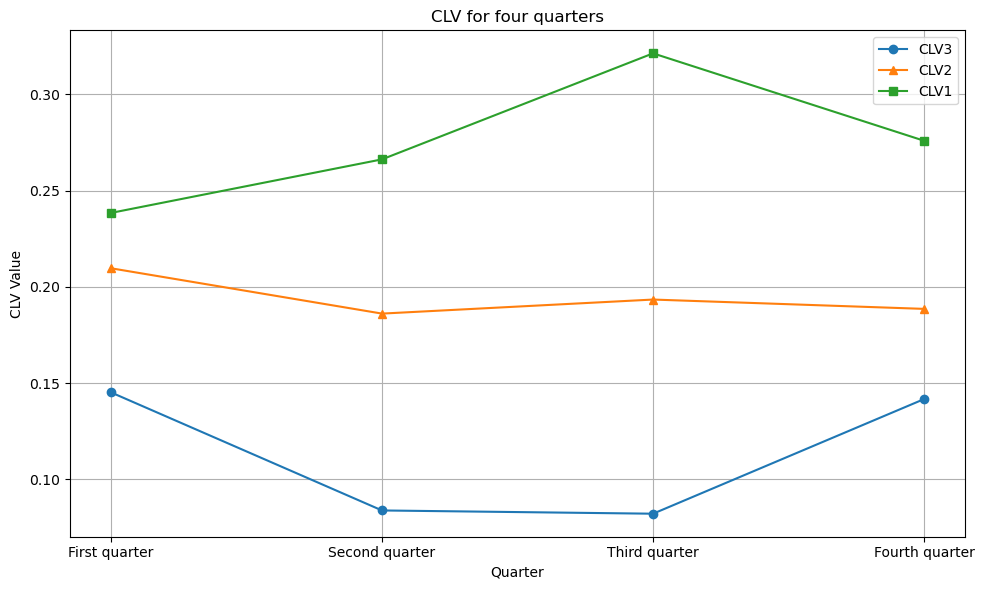

In [7]:
# Generate CLV Line Chart
import pandas as pd
import matplotlib.pyplot as plt

# Load data
clv_data = pd.read_csv('E:/Desktop/MiniProject/CLV_Ranked.csv')

# Separate different CLV Ranks, assuming the data is already sorted
clv_ranks = clv_data['CLV_Rank'].unique()

# Plot the line graph
plt.figure(figsize=(10, 6))
markers = ['o', '^', 's', 'd']  # Different marker styles

for i, clv_rank in enumerate(clv_ranks):
    # Fetch data for a specific CLV Rank
    rank_data = clv_data[clv_data['CLV_Rank'] == clv_rank]
    plt.plot(rank_data['Quarter'], rank_data['CLV_value'], marker=markers[i], label=clv_rank)

# Set the x-axis tick labels
quarters = ['First quarter', 'Second quarter', 'Third quarter', 'Fourth quarter']
plt.xticks(clv_data['Quarter'].unique(), quarters)

plt.title('CLV for Four Quarters')
plt.xlabel('Quarter')
plt.ylabel('CLV Value')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Prevent label overlap

# Save as a PDF file
# plt.savefig('E:/Desktop/MiniProject/CLV_for_four_quarters.pdf', format='pdf')